In [4]:
###build a basic chatbot using langgraph

In [6]:
%pip install langgraph

from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END, add_messages


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/44.7 kB ? eta -:--:--
     ---------------------------------------- 44.7/44.7 kB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/152.4 kB ? eta -:--:--
   ---------------------------------------- 152.4/152.4 kB 8.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/438.9 kB ? eta -:--:--
   -------------------- ------------------- 225.3/438.9 kB 6.9 MB/s eta 0:00:01
   ---------------------------------------- 438.9/438.9 kB 5.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/43.8 kB ? eta -:--:--
   ---------------------------------------- 43.8/43.8 kB 2.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/50.0 kB ? eta -:--:--
   ---------------------------------------- 50.0/50.0 kB 2.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/364.6 kB ? eta -:--:--
   ------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain 0.3.18 requires langsmith<0.4,>=0.1.17, but you have langsmith 0.4.1 which is incompatible.
langchain-community 0.3.17 requires langsmith<0.4,>=0.1.125, but you have langsmith 0.4.1 which is incompatible.


In [7]:
class State(TypedDict):
    #Messages have type "list " the add_messages function will convert them to the correct type
    messages:Annotated[list,add_messages]
graph_builder= StateGraph(State)    

In [8]:
import os 
from dotenv import load_dotenv
load_dotenv()

False

In [12]:
%pip install langchain-groq

from langchain_groq import ChatGroq
from langchain.chat_models import init_chat_model
llm = ChatGroq(model="llama3-8b-8192")

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/130.2 kB ? eta -:--:--
   ---------------------------------------- 130.2/130.2 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [13]:
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x0000021A27237710>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000021A272DB530>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [14]:
llm = init_chat_model("groq:llama3-8b-8192")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x0000021A271AEEA0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000021A272FB0B0>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [15]:
## Node function to handle the chatbot logic

def chatbot(state: State):
    return {"meesages":[llm.invoke(state["messages"])]}

    

In [16]:
graph_builder = StateGraph(State) 
## Adding Node to the graph
graph_builder.add_node("llmchatbot",chatbot)
## adding edges
graph_builder.add_edge(START, "llmchatbot")
graph_builder.add_edge("llmchatbot", END)
##compile the grpah 
graph = graph_builder.compile()

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


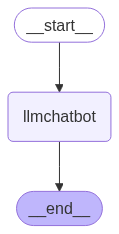

In [18]:
# visulaise the graph
%pip install IPython

from IPython.display import Image, display
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception as e:
    print(f"Error displaying graph: {e}")